# K-Means Approach to analyze reduce data set from _communities.data_

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

## Reading data

In [24]:
DATA = pd.read_csv("DataFrame_Reducido.csv", index_col="Unnamed: 0")
DATA

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.00,0.37,0.72,0.20
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.00,0.58,0.89,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,0.02,0.90,0.50,0.72,0.03
5,0.02,0.28,0.06,0.54,1.00,0.25,0.31,0.48,0.27,0.37,0.04,1.00,0.52,0.68,0.14
6,0.01,0.39,0.00,0.98,0.06,0.02,0.30,0.37,0.23,0.60,0.02,0.81,0.42,0.50,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,0.03,1.00,0.42,0.74,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,0.06,1.00,0.28,0.76,0.45
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,0.17,1.00,0.31,0.47,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,0.09,1.00,0.44,0.64,0.19


## Finding optimal number of cluster for K-Means

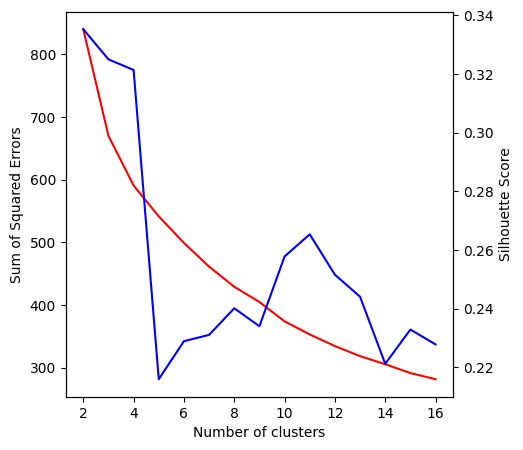

In [25]:
SSE = []
SILS = []
N = 16
Rango_Clusters = range(2, N+1)
for n in Rango_Clusters:
    K_Means = KMeans(n_clusters = n, init = "k-means++", n_init = 20, random_state = 21)
    K_Means.fit(DATA)
    Labels = K_Means.labels_

    SSE.append(K_Means.inertia_)
    SILS.append(silhouette_score(DATA, Labels, metric="euclidean"))

Figura, Sub1 = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
Sub2 = Sub1.twinx()

Sub1.plot(Rango_Clusters, SSE, "-r")
Sub1.set_xlabel("Number of clusters")
Sub1.set_ylabel("Sum of Squared Errors")

Sub2.plot(Rango_Clusters, SILS, "-b")
Sub2.set_ylabel("Silhouette Score")

plt.show()

By identifying the max value of the Silhouette scoures, we can observer that with 4 clusters we maximize this quantity. For this, we will pick this as the optimal number of clusters.

## Using optimal number of clusters

In [26]:
N_Clusters = 4
K_Means = KMeans(n_clusters = N_Clusters, init = "random", n_init = 20, random_state = 42)
K_Means.fit(DATA)

DATA["Cluster_Class"] = K_Means.predict(DATA)
DATA.Cluster_Class.value_counts()

2    786
3    387
0    231
1    205
Name: Cluster_Class, dtype: int64

## Observing variables by K-Means clustering

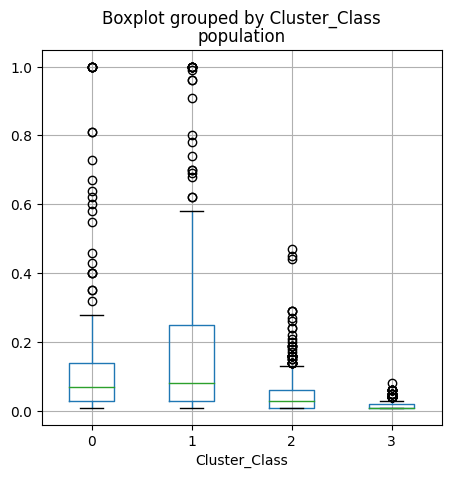

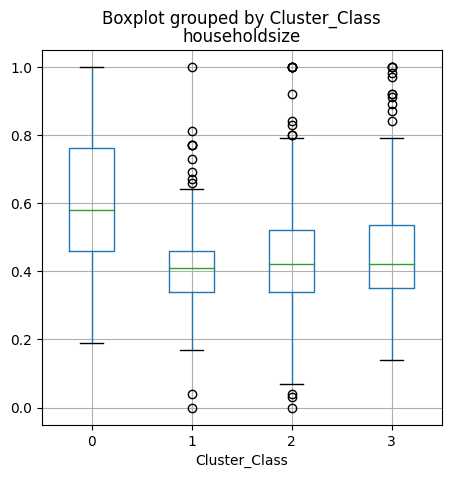

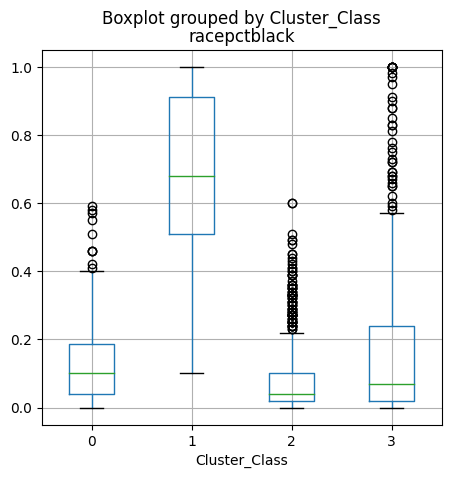

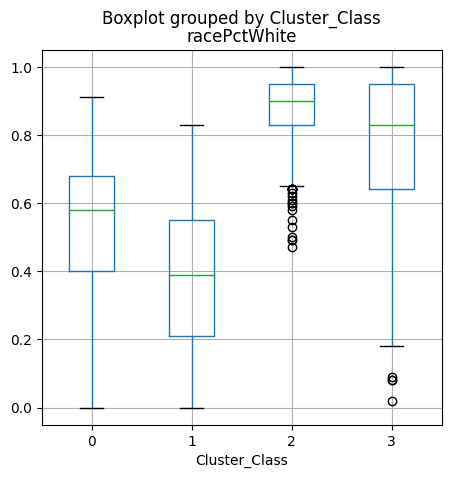

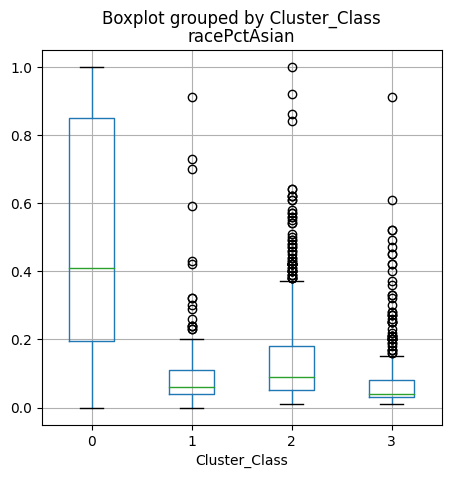

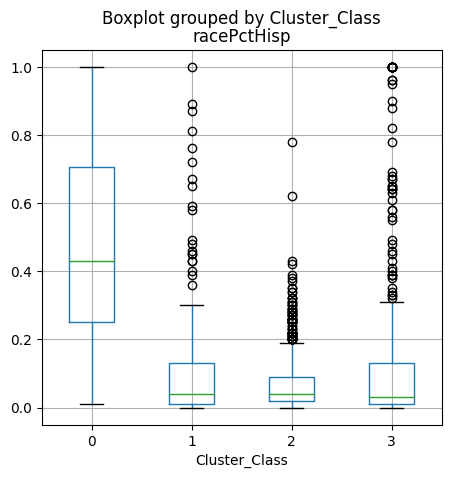

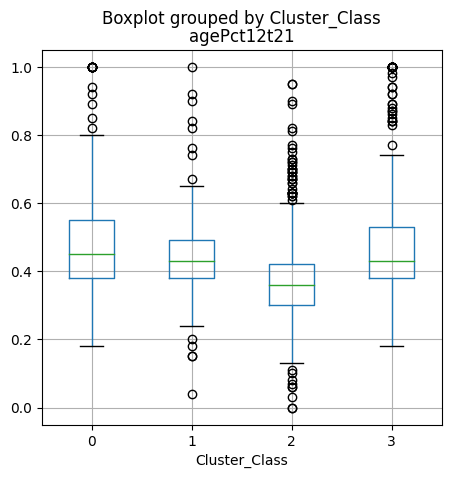

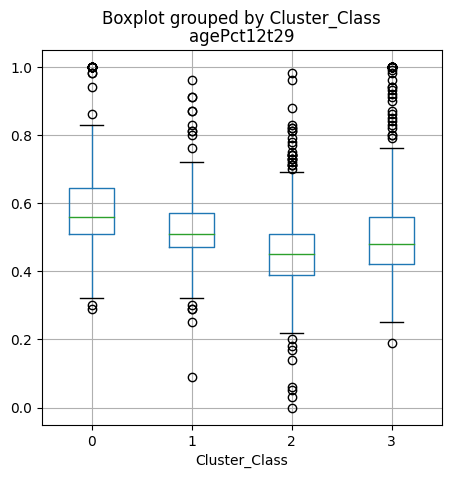

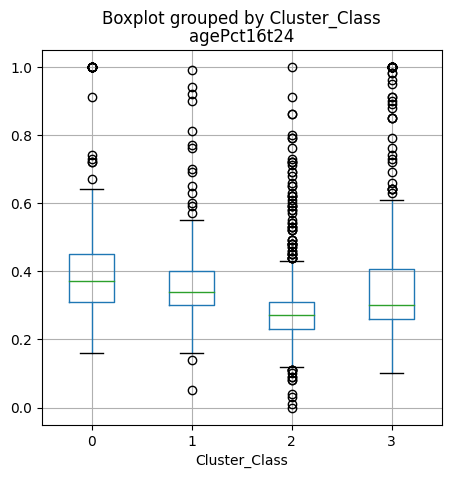

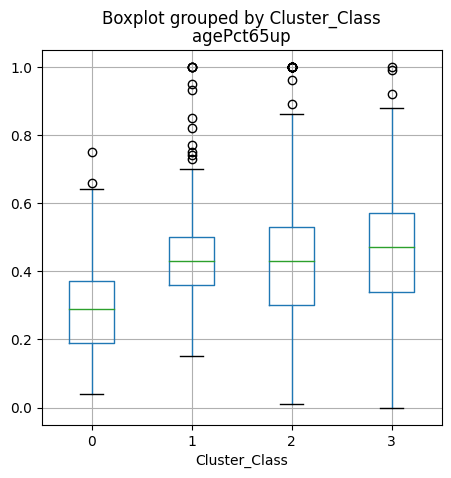

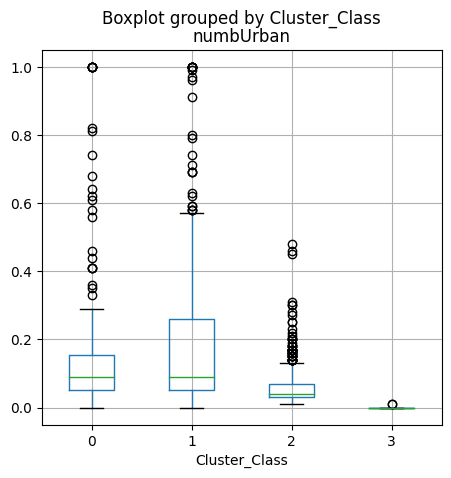

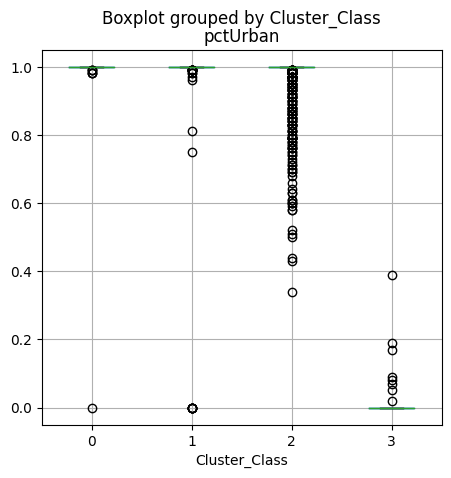

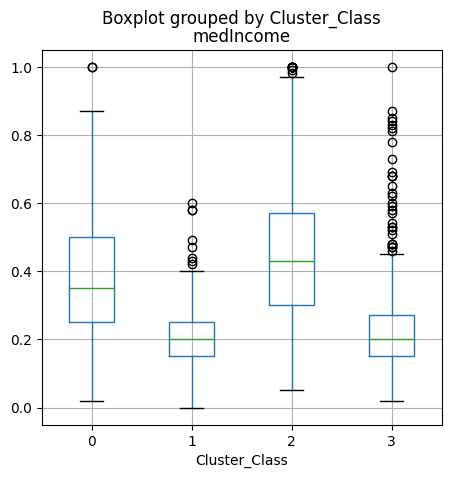

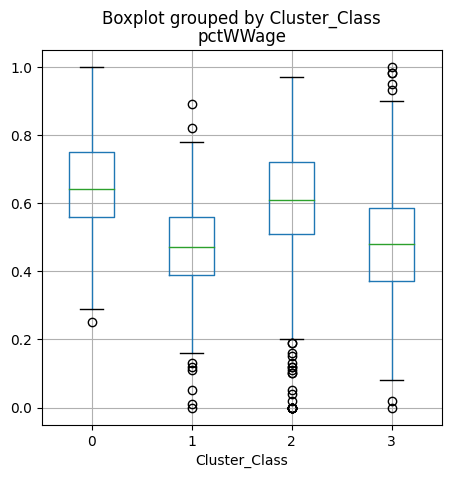

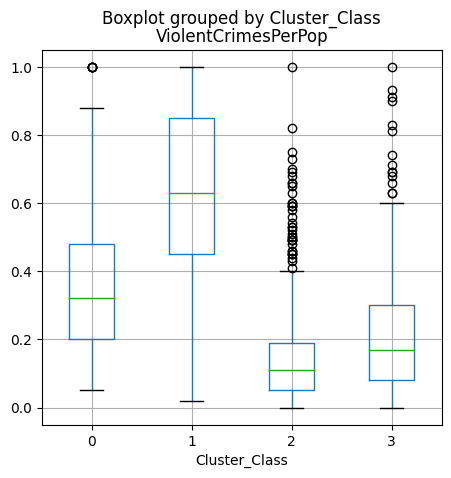

In [27]:
for column in DATA.columns[:-1]:
    DATA.boxplot(column = column, by = "Cluster_Class", figsize = (5,5))
    plt.show()